In [1]:
#importing libraries
import pandas as pd
import numpy as np
import pandas_datareader as web
import seaborn as sns
import matplotlib.pyplot as plt
!pip install mplfinance
import mplfinance as mpf
import datetime as dt
from matplotlib.pyplot import figure

In [2]:
#Training AND testing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.python import *

In [3]:
against_curr = 'USD'

In [4]:
crypto_doge = 'DOGE'
colnames = []

In [5]:
start = dt.datetime(2016,1,1)
end = dt.datetime.now()

datadb = web.DataReader(f'{crypto_doge}-{against_curr}', 'yahoo', start, end)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(datadb['Close'].values.reshape(-1,1))
prediction_days = 60
#future_days01 = 180

In [6]:
x_train, y_train = [], []
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [7]:
#creating neural network
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
65/65 [==============================] - 12s 70ms/step - loss: 0.0037
Epoch 2/25
65/65 [==============================] - 5s 84ms/step - loss: 0.0021
Epoch 3/25
65/65 [==============================] - 6s 89ms/step - loss: 0.0015
Epoch 4/25
65/65 [==============================] - 6s 94ms/step - loss: 0.0013
Epoch 5/25
65/65 [==============================] - 5s 79ms/step - loss: 0.0014
Epoch 6/25
65/65 [==============================] - 7s 109ms/step - loss: 0.0012
Epoch 7/25
65/65 [==============================] - 6s 86ms/step - loss: 0.0012
Epoch 8/25
65/65 [==============================] - 5s 84ms/step - loss: 0.0011
Epoch 9/25
65/65 [==============================] - 5s 81ms/step - loss: 0.0013
Epoch 10/25
65/65 [==============================] - 5s 82ms/step - loss: 0.0012
Epoch 11/25
65/65 [==============================] - 6s 90ms/step - loss: 0.0011
Epoch 12/25
65/65 [==============================] - 5s 82ms/step - loss: 0.0010
Epoch 13/25
65/65 [================

In [8]:
#testing model
test_start = dt.datetime(2021, 1, 1)
test_end = dt.datetime.now()

In [9]:
test_data = web.DataReader(f'{crypto_doge}-{against_curr}', 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values


total_dataset = pd.concat((datadb['Close'],test_data['Close']), axis = 0)

In [10]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [11]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

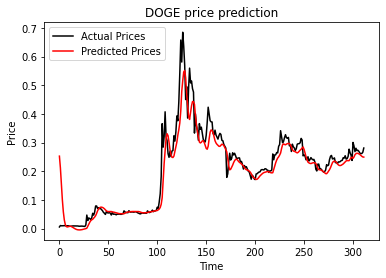

In [12]:
plt.plot(actual_prices, color = 'black', label = "Actual Prices")
plt.plot(prediction_prices, color = "red", label = "Predicted Prices")
plt.title(f'{crypto_doge} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc = "upper left")
plt.show()


In [15]:
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs) - 1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [16]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

[[0.24928214]]
